<a href="https://colab.research.google.com/github/lrburle/ML_Assignment1/blob/master/assignment1_LandonBurleson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Landon Burleson - Fall 2022

This assigment is used to demonstrate a basic Linear Regression model for various data sets. 

In [637]:
!git clone https://github.com/lrburle/ML_Assignment1.git

fatal: destination path 'ML_Assignment1' already exists and is not an empty directory.


Shown below are the necessary imports needed for the assignment. 

In [638]:
import numpy as np
import matplotlib.pyplot as plt
import csv

The below code is used for the top level class of the assignment:

In [639]:
class assign1:
        def __init__(self):
                self.a = 0.3 #Learning rate

                #Basis Function Variables
                self.mu = 0 #Mean Value
                self.phi = 1 #Variance
        
        def init_theta(self, m, n):
                self.theta = np.random.random((m, n))

        def hypothesis(self, xdata):
                y = np.dot(self.theta, xdata)
                return y

        def costFunction(self, xdata, ydata):
                [m, n] = xdata.shape

                sum = 0
                for i in range(m):
                        sum += (self.hypothesis(xdata[i])-ydata[i])**2
                costf = (1/m) * sum

                return costf

        def gradientDescent(self, xdata, ydata):
                [m, n] = xdata.shape

                theta_new = self.theta.copy()

                for j in range(n):
                        sum = 0 
                        for i in range(m):
                                sum += (self.hypothesis(xdata[i]) - ydata[i]) * xdata[i, j]

                        theta_new[0, j] = self.theta[0, j] - self.a * (1 / m) * sum
                
                self.theta = theta_new 

	#Used to modifify the input data appropriately
        def sigmoidBasis(self, data):
                [m,n] = data.shape
                out = np.zeros((m, 1))
                out[:,0] = np.exp(((data[:, 0] - self.mu) ** 2) / (2*self.phi**2)) 
                return np.concatenate((data, out), axis=1)

        def polynomialBasis(self, data, order):
                [m,n] = data.shape
                out = np.zeros((m, 1))
                out[:,0] = data[:, 0] ** order
                return np.concatenate((data, out), axis=1) 
        
        def concatOnes(self, data):
                [m,n] = data.shape
                out = np.ones((m, 1))
                return np.concatenate((out, data), axis=1)
        
        #Parses the csv data for question 2
        def csvParse(self, csvFile):
                file = open(csvFile, 'r')
                #Grabbing the header names for each column
                reader = csv.DictReader(file)
                header = reader.fieldnames
                header = header[1:-1]
                file = file.readlines()[0:]
                data = np.loadtxt(file, delimiter=',')

                [x,y] = data.shape

                x_train = data[0:(x//2), 1:(y-1)]
                y_train = data[0:(x//2), (y-1)]
                x_test = data[(x//2):x, 1:(y-1)]
                y_test = data[(x//2):x, (y-1)]
                
                return x_train, y_train, x_test, y_test, header

	#Selects a feature set from the question 2 dataset
        def featureSelection(self, data, columns):
                [m,n] = data.shape

                for i in columns:
                        if i == 0:
                                data_out = data[:, 0].reshape((m, 1)) 
                        else:
                                data_out = np.concatenate((data_out, data[:, i].reshape((m, 1))), axis=1)

                return data_out
        
        #Calculates the prediction error.
        def predictionError(self, actual, predicted):
                return (np.abs(actual - predicted) / np.abs(actual))

       	#Local weight algorithms used for Question 3
        def normalEquations(self, X, W, Y):
                self.theta = ((X.T*(W * X)).I*(X.T*W*Y.T))

        def localWeights(self, query, tao, x_train):
                [m, n] = x_train.shape
                w = np.mat(np.eye(m))
                for i in range(m):
                        w[i, i]  = np.exp(((x_train[i] - query) * (x_train[i] - query).T) / (-2*tao**2))
                return w 

        def costFunctionLR(self):
                [m, n] = self.w.shape

                for i in range(m):
                       self.costfLR += self.w[i] * (self.theta.T * self.x_train[i] - self.y_train[i])
                
                self.constfLR = 0.5 * self.constfLR 
        
        def hypothesisDataGeneration(self, lowerbounds, upperbounds, order):
                xdata = np.linspace(lowerbounds, upperbounds, 1000)
                data = xdata 

                data = data.reshape((1000, 1))

                for i in range(2, order+1):
                        data = self.polynomialBasis(data, i)

                data = self.concatOnes(data) #Input data with the order desired to be concatenated into the original dataset.

                h = []

                for i in range(1000):
                        h.append(self.hypothesis(data[i]))

                return xdata, h

In [640]:
a1 = assign1() #Used to create the a1 object to be used throughout the assignment.

# Question 1

The code found in the block below initializes the data set and the various variables used to measure the accuracy the built model.

In [641]:
#Load in the data to be used for question 1
x_test = np.load('./ML_Assignment1/x_test.npy')
x_train = np.load('./ML_Assignment1/x_train.npy')
y_test = np.load('./ML_Assignment1/y_test.npy')
y_train = np.load('./ML_Assignment1/y_train.npy')

#Training the model for assignment 1
order = 1 #Changes the polynomial basis functions.

for i in range(2, order+1):
        x_train = a1.polynomialBasis(x_train, i) #Input data with the order desired to be concatenated into the original dataset.

x_train = a1.concatOnes(x_train) #Place 1's in the first column of the data set. 

[n, m] = x_train.shape

#Initialize the Parameters based upon the dimensionality of the training dataset
a1.init_theta(1, m)

#Generate the initial hypothesis function
x, h = a1.hypothesisDataGeneration(np.min(x_train[:, 1]),np.max(x_train[:,1]), order )

#Generate initial point for cost function
error = []
error.append(a1.costFunction(x_train, y_train))

The following code block is used to plot and execute the gradient descent algorithm on the training dataset provided above. 

Initialzed theta array is: [[0.60703967 0.38146629]]
Current iteration is 0 @ error = [220.09418818]
Current iteration is 1 @ error = [186.11667642]
Current iteration is 2 @ error = [177.57586435]
Current iteration is 3 @ error = [173.42719149]
Current iteration is 4 @ error = [171.36751994]
Current iteration is 5 @ error = [170.34445361]
Current iteration is 6 @ error = [169.83627717]
Current iteration is 7 @ error = [169.58385624]
Current iteration is 8 @ error = [169.45847394]
Current iteration is 9 @ error = [169.39619417]
Current iteration is 10 @ error = [169.36525861]
Current iteration is 11 @ error = [169.34989233]
Current iteration is 12 @ error = [169.34225961]
Current iteration is 13 @ error = [169.33846829]
Current iteration is 14 @ error = [169.33658506]
Current iteration is 15 @ error = [169.33564963]
Current iteration is 16 @ error = [169.33518499]
Current iteration is 17 @ error = [169.33495419]
Current iteration is 18 @ error = [169.33483954]
Current iteration is 19 @ 

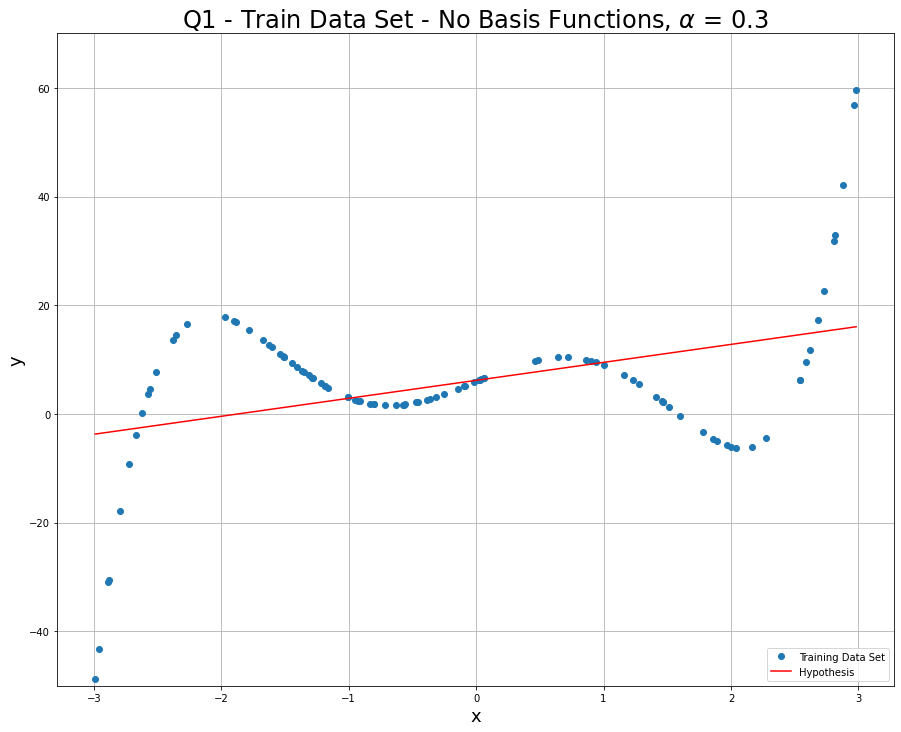

Theta array after training: [[6.19057909 3.30633037]]


In [642]:
#Plot the initial training data and hypothesis function.
plt.figure(0, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q1 - Train Data Set - No Basis Functions, ' + r'$\alpha$ = ' + f'{a1.a}', fontsize=24)
plt.ylim(-50, 70)
og, hypth = plt.plot(x_train[:, 1], y_train, 'o', x, h, 'r-')

hypth.set_label('Hypothesis')
og.set_label('Training Data Set')
plt.legend(loc='lower right')
plt.grid()

print(f'Initialzed theta array is: {a1.theta}')

iterations = 100
for k in range(iterations):
        print(f'Current iteration is {k} @ error = {error[-1]}')
        a1.gradientDescent(x_train, y_train)
        x, h = a1.hypothesisDataGeneration(np.min(x_train[:, 1]),np.max(x_train[:,1]), order)
        error.append(a1.costFunction(x_train, y_train))
        epsilon = np.abs(error[-1] - error[-2])
        hypth.set_ydata(h)
        plt.draw()
        if (epsilon < 10e-6):
                print('Convergence threshold met.')
                break

plt.show()

print(f'Theta array after training: {a1.theta}')

The following code utilizes the linear regression model trained via gradient descent as shown above.

RMSE for the test data set is: [1.6796546]


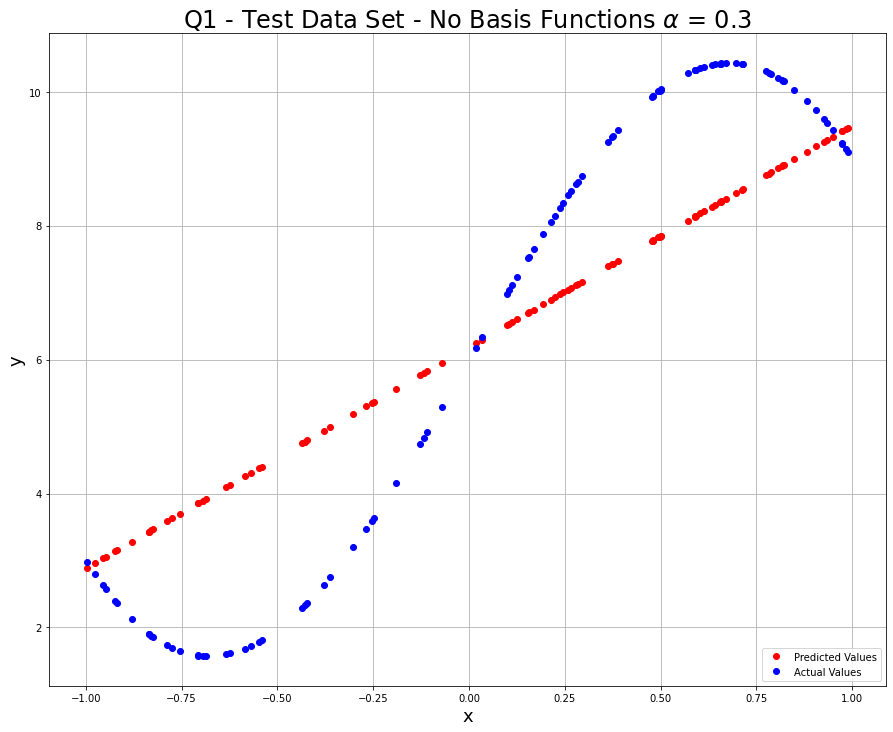

In [643]:
#Testing the model for Question 1
for i in range(2, order+1):
        x_test = a1.polynomialBasis(x_test, order) #Input data with the order desired to be concatenated into the original dataset.
x_test = a1.concatOnes(x_test) #Input data with the order desired to be concatenated into the original dataset.

plt.figure(1, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid()

plt.title(r'Q1 - Test Data Set - No Basis Functions $\alpha$' + f' = {a1.a}', fontsize=24)

y = []

for i in range(n):
        y.append(a1.hypothesis(x_test[i]))

#Plotting the actual and predicted values based on the hypothesis function found from training.
test, hypth = plt.plot(x_test[:, 1], y, 'ro', x_test[:, 1] , y_test, 'bo')
test.set_label('Predicted Values')
hypth.set_label('Actual Values')
plt.legend(loc='lower right')

#Takikng the Root Mean Squared Error (RMSE)
error = np.sqrt(a1.costFunction(x_test, y_test))
print(f'RMSE for the test data set is: {error}')

The above plot illustrates that the test data and training data are both non-linear in nature. Therefore, the best way to reduce the error shown above is to provide basis functions to add dimensionality to the data. The best approach would be to use the polynomial basis functions to predict data more accurately than just strictly using a linear approach. 

# Question 1 - Basis Functions

In [644]:
#Training the model for assignment 1
#Load in the data to be used for question 1
x_test = np.load('./ML_Assignment1/x_test.npy')
x_train = np.load('./ML_Assignment1/x_train.npy')
y_test = np.load('./ML_Assignment1/y_test.npy')
y_train = np.load('./ML_Assignment1/y_train.npy')

order = 3 #Changes the polynomial basis functions.
a1.a = 0.01

for i in range(2, order+1):
        x_train = a1.polynomialBasis(x_train, i) #Input data with the order desired to be concatenated into the original dataset.

x_train = a1.concatOnes(x_train) #Place 1's in the first column of the data set. 

[n, m] = x_train.shape

#Initialize the Parameters based upon the dimensionality of the training dataset
a1.init_theta(1, m)

#Generate the initial hypothesis function
x, h = a1.hypothesisDataGeneration(np.min(x_train[:, 1]),np.max(x_train[:,1]), order)

#Generate initial point for cost function
error = []
error.append(a1.costFunction(x_train, y_train))

Initialzed theta array is: [[0.25029813 0.66457124 0.73790224 0.23776845]]
Current iteration is 0 @ error = [170.66488947]
Current iteration is 1 @ error = [142.06700303]
Current iteration is 2 @ error = [140.30120781]
Current iteration is 3 @ error = [139.32583874]
Current iteration is 4 @ error = [138.46577994]
Current iteration is 5 @ error = [137.67671133]
Current iteration is 6 @ error = [136.9384014]
Current iteration is 7 @ error = [136.23718868]
Current iteration is 8 @ error = [135.56367795]
Current iteration is 9 @ error = [134.91139596]
Current iteration is 10 @ error = [134.2758748]
Current iteration is 11 @ error = [133.65402301]
Current iteration is 12 @ error = [133.04369394]
Current iteration is 13 @ error = [132.44338963]
Current iteration is 14 @ error = [131.85205757]
Current iteration is 15 @ error = [131.26895119]
Current iteration is 16 @ error = [130.69353415]
Current iteration is 17 @ error = [130.1254147]
Current iteration is 18 @ error = [129.56430053]
Current

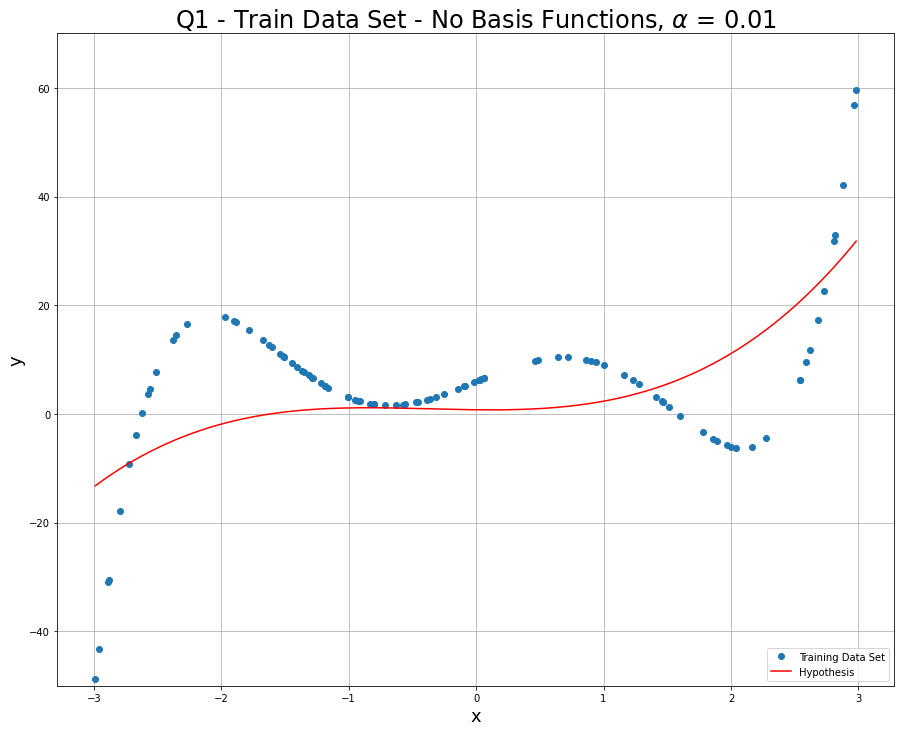

Theta array after training: [[ 0.77395569 -0.25623938  0.96345793  0.87497442]]


In [645]:
#Plot the initial training data and hypothesis function.
plt.figure(0, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q1 - Train Data Set - No Basis Functions, ' + r'$\alpha$ = ' + f'{a1.a}', fontsize=24)
plt.ylim(-50, 70)
og, hypth = plt.plot(x_train[:, 1], y_train, 'o', x, h, 'r-')

hypth.set_label('Hypothesis')
og.set_label('Training Data Set')
plt.legend(loc='lower right')
plt.grid()

print(f'Initialzed theta array is: {a1.theta}')

iterations = 20
for k in range(iterations):
        print(f'Current iteration is {k} @ error = {error[-1]}')
        a1.gradientDescent(x_train, y_train)
        x, h = a1.hypothesisDataGeneration(np.min(x_train[:, 1]),np.max(x_train[:,1]), order)
        error.append(a1.costFunction(x_train, y_train))
        epsilon = np.abs(error[-1] - error[-2])
        hypth.set_ydata(h)
        plt.draw()
        if (epsilon < 10e-6):
                print('Convergence threshold met.')
                break

plt.show()

print(f'Theta array after training: {a1.theta}')

RMSE for the test data set is: [6.65395396]


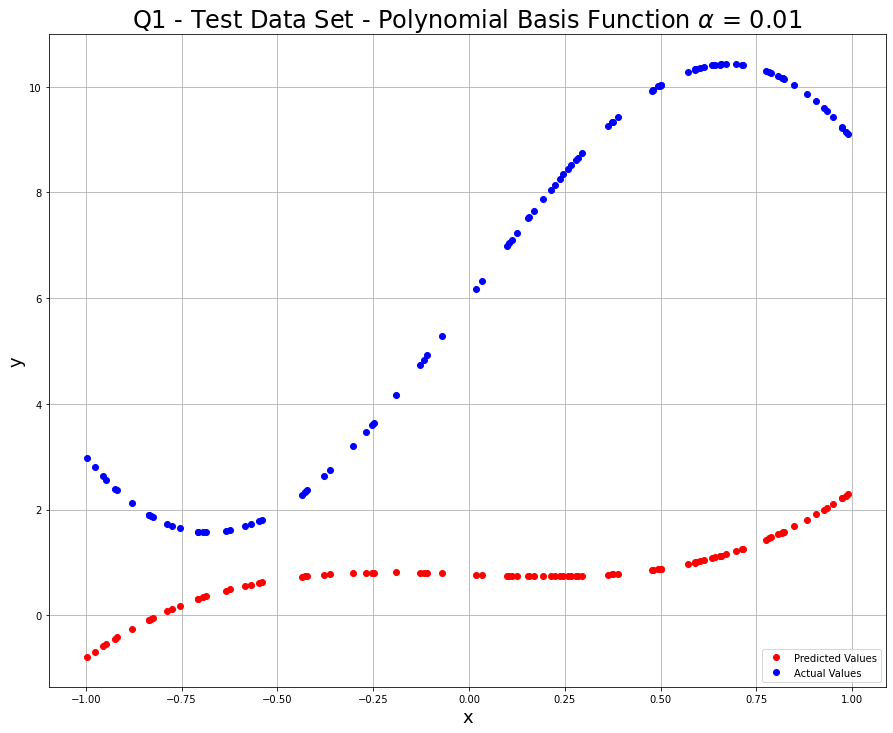

In [646]:
#Testing the model for Question 1
for i in range(2, order+1):
        x_test = a1.polynomialBasis(x_test, order) #Input data with the order desired to be concatenated into the original dataset.
x_test = a1.concatOnes(x_test) #Input data with the order desired to be concatenated into the original dataset.

plt.figure(1, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid()

plt.title(r'Q1 - Test Data Set - Polynomial Basis Function $\alpha$' + f' = {a1.a}', fontsize=24)

y = []

for i in range(n):
        y.append(a1.hypothesis(x_test[i]))

#Plotting the actual and predicted values based on the hypothesis function found from training.
test, hypth = plt.plot(x_test[:, 1], y, 'ro', x_test[:, 1] , y_test, 'bo')
test.set_label('Predicted Values')
hypth.set_label('Actual Values')
plt.legend(loc='lower right')

#Takikng the Root Mean Squared Error (RMSE)
error = np.sqrt(a1.costFunction(x_test, y_test))
print(f'RMSE for the test data set is: {error}')

# Question 1 - Responses:

1.   The training and test datasets are both non-linear in nature. Both datasets are polynomials of differing orders. 
2.   The best approach to the datasets given would be to use non-linear basis functions (i.e. polynomial or gaussian) to provide better predictions for the output data based upon the input test dataset. See above basis function graphs for the x-y relationship prediction results. 






# Question 2

The following code blocks are used to create the plots and graphics necessary to model question two. 

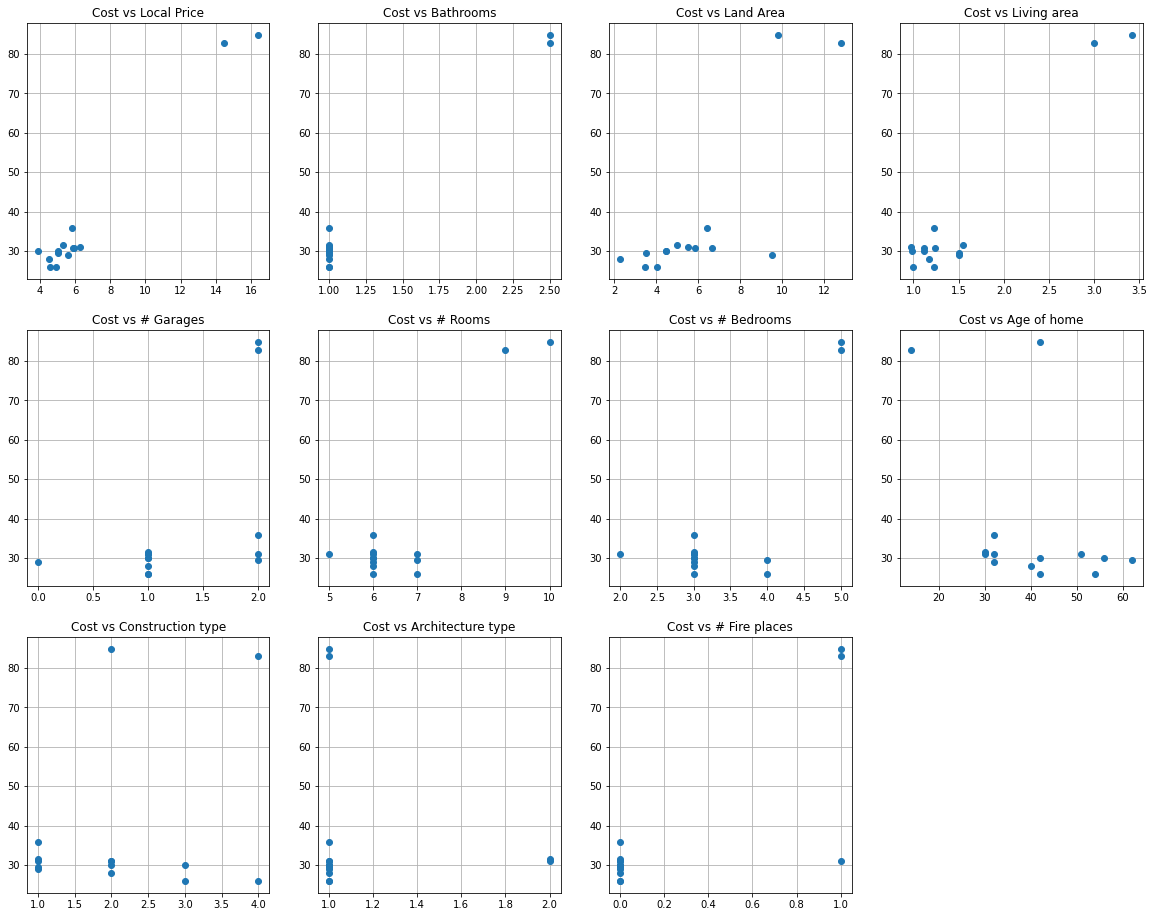

In [647]:
#Updating the data for Question 2 from the CSV file. 
a1.a = 0.3
order = 1
[x_train, y_train, x_test, y_test, header] = a1.csvParse('./ML_Assignment1/Assignment1_Q2_Data.csv')

x_train = a1.concatOnes(x_train) #Place 1's in the first column of the data set. 
x_test = a1.concatOnes(x_test) #Input data with the order desired to be concatenated into the original dataset.

plt.figure(4, figsize=[20, 16])

for i, s in enumerate(header):
        plt.subplot(3, 4, i+1)
        plt.plot(x_train[:, i+1], y_train, 'o')
        plt.title(f'Cost vs {s}')
        plt.grid()

plt.show()

[n, m] = x_train.shape

#Initialize the Parameters based upon the dimensionality of the training dataset
a1.init_theta(1, m)

Initialzed theta array is: [[0.35979655 0.19461972 0.63435579 0.74526242 0.55695836 0.48981199
  0.06269869 0.70175556 0.3946564  0.60291689 0.00737079 0.76511029]]
Theta array after training: [[-7.82082674e+121 -6.76014949e+122]]
Theta array after training: [[-5.29931058 35.37643063]]
Theta array after training: [[-1.09881030e+109 -7.98711021e+109]]
Theta array after training: [[-0.34219489 25.22700798]]
Theta array after training: [[15.03373666 17.51948013]]
Theta array after training: [[-2.49357715e+111 -1.71735994e+112]]
Theta array after training: [[-1.42810214e+46 -5.05257871e+46]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


Theta array after training: [[6.55238450e+268 2.86661282e+270]]
Theta array after training: [[26.49424373  5.33555229]]
Theta array after training: [[39.40928488 -1.91069104]]
Theta array after training: [[29.79573601 36.29069195]]


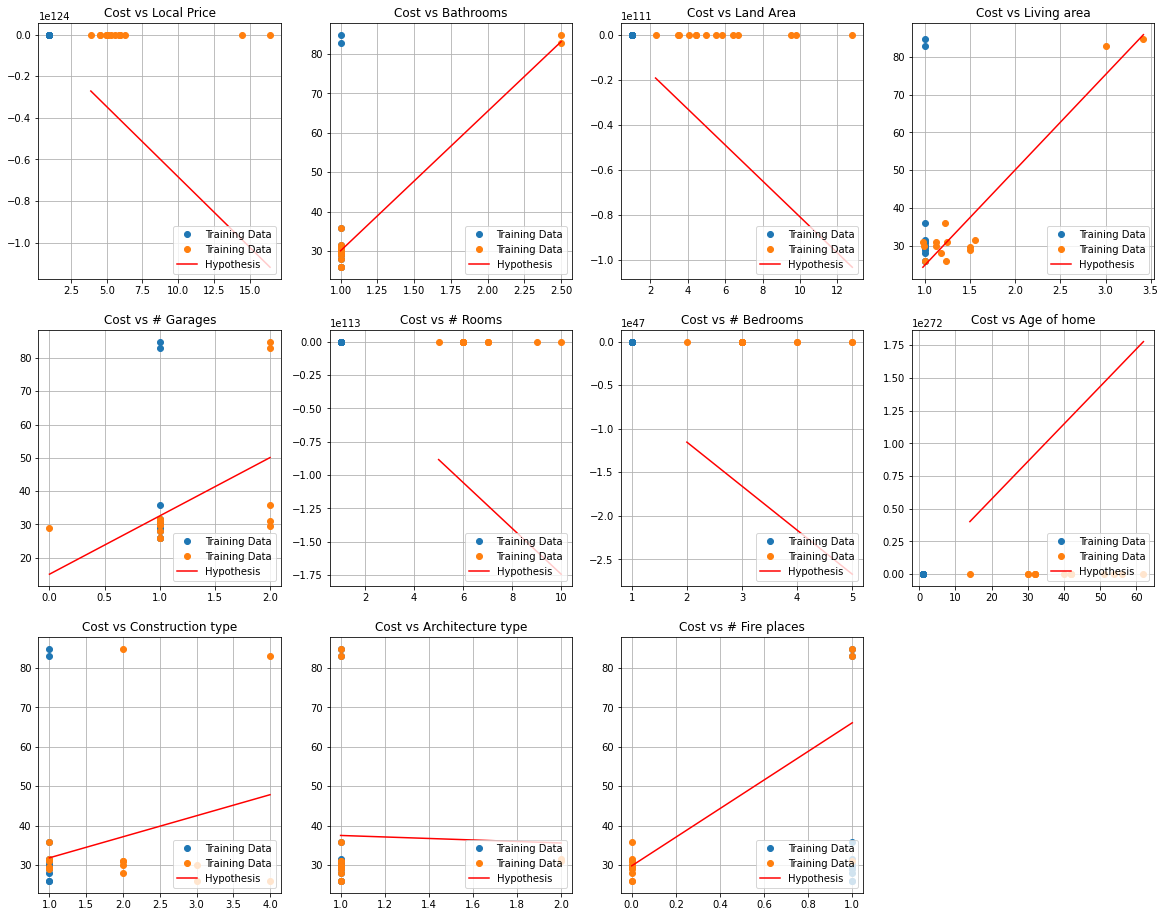

In [648]:
#Initialize the Parameters based upon the dimensionality of the training dataset
iterations = 100
theta_f = []
error = []

print(f'Initialzed theta array is: {a1.theta}')

plt.figure(5, figsize=[20, 16])

for i, s in enumerate(header):
        x_train_i = a1.featureSelection(x_train, [0,i+1])

        [n, m] = x_train_i.shape
        a1.init_theta(1, m)
        error.append(a1.costFunction(x_train_i, y_train))

        for k in range(iterations): #Gradient Descent algorithm. 
                a1.gradientDescent(x_train_i, y_train)
                x, h = a1.hypothesisDataGeneration(np.min(x_train_i[:, 1]),np.max(x_train_i[:,1]), order)
                error.append(a1.costFunction(x_train_i, y_train))
                epsilon = np.abs(error[-1] - error[-2])
                if (epsilon < 10e-6):
                        print('Convergence threshold met.')
                        break
        theta_f.append(a1.theta)
        plt.subplot(3,4,i+1)
        plt.plot(x_train_i, y_train, 'o', label='Training Data')
        plt.plot(x, h, 'r-', label='Hypothesis')
        plt.title(f'Cost vs {s}')
        plt.legend(loc='lower right')
        plt.grid()

        print(f'Theta array after training: {a1.theta}')

plt.show()

The above graph represents each individual feature put through gradient descent with linear regression. Notice, only certain features were able to achieve convergence. Other features such as "Cost vs Land Area", "Cost vs #Rooms", "Cost vs # Bedrooms" and "Cost vs Age of Home" were unable to achieve a reasonable convergence for the hypothesis function to accurately predict the cost of the home. The other features that appear to be more linear and continuous, the regression algorithm was able to provide a line of best fit for the given data. A few of the graphs seemingly performed better than others. One such case is "Cost vs Living area". This figure shown above shows a clear linear correlation between the input and output data. Same is true for the "Cost vs Bathrooms" feature shown above.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square


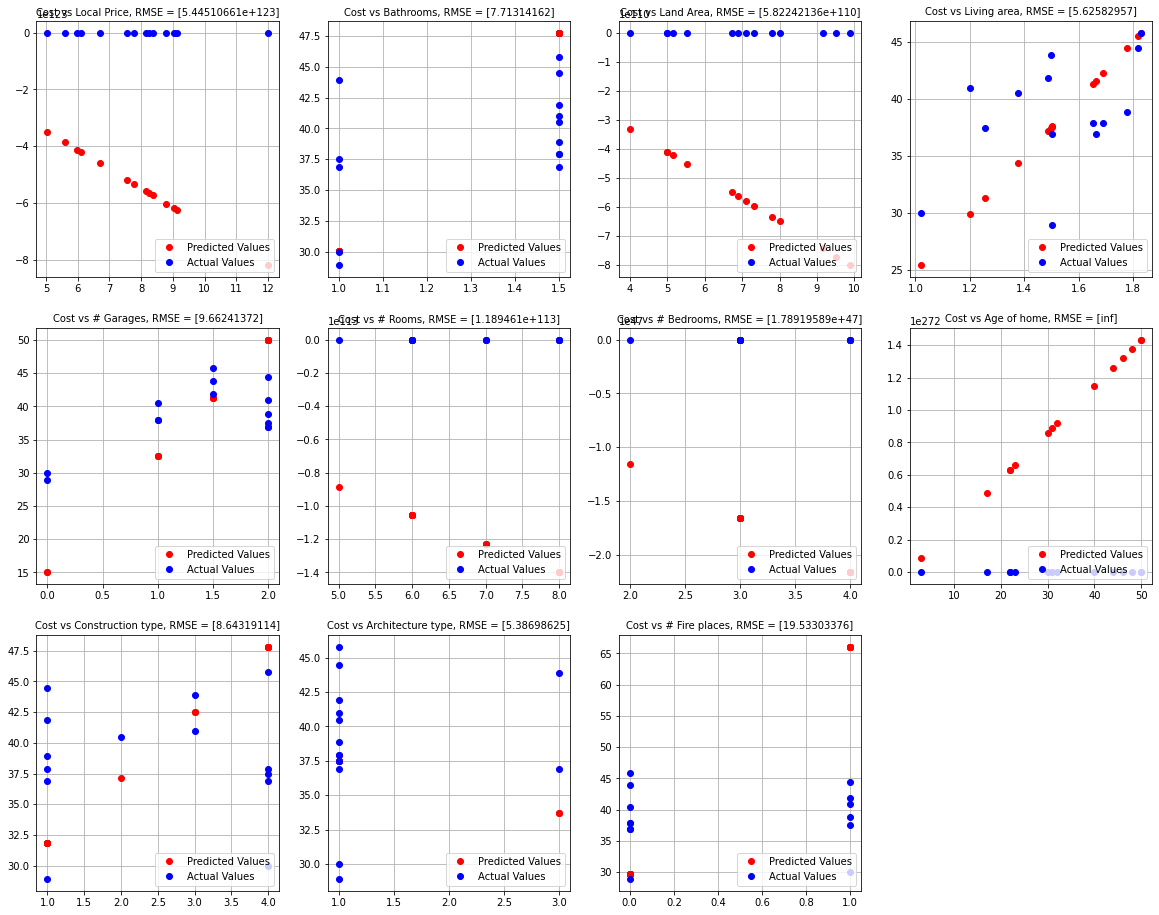

In [649]:
plt.figure(6, figsize=[20, 16])

for i, s in enumerate(header):
        x_test_i = a1.featureSelection(x_test, [0,i+1])
        [n, m] = x_test_i.shape
        a1.theta = theta_f[i]
        y = []

        for j in range(n):
                y.append(a1.hypothesis(x_test_i[j]))
        
        error = np.sqrt(a1.costFunction(x_test_i, y_test))

        plt.subplot(3,4,i+1)
        plt.plot(x_test_i[:, 1], y, 'ro', label='Predicted Values')
        plt.plot(x_test_i[:, 1] , y_test, 'bo', label='Actual Values')
        plt.title(f'Cost vs {s}, RMSE = {error}', fontsize=10)
        plt.legend(loc='lower right')
        plt.grid()

The above graph shows the prediction results (red points) and the actual points in blue. Reviewing the prediction results with respect to the RMSE metric shown in the top right of each subplot, the RMSE values closest to 0 indicate the best features to use to ultimately predict the cost of a home. With this in mind, the best features to use are "Living area", "Architecture type", "Construction type", "Bathrooms", and "Garages". 

Initialzed theta array is: [[29.79573601 36.29069195]]
Theta array after training: [[4.05775707e+273 7.47610030e+272 3.54623773e+273 9.29306070e+272
  8.17041127e+272 4.24389614e+273 2.14452230e+273 2.77166161e+274
  1.32424583e+273 7.09144086e+272 1.29117071e+272]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


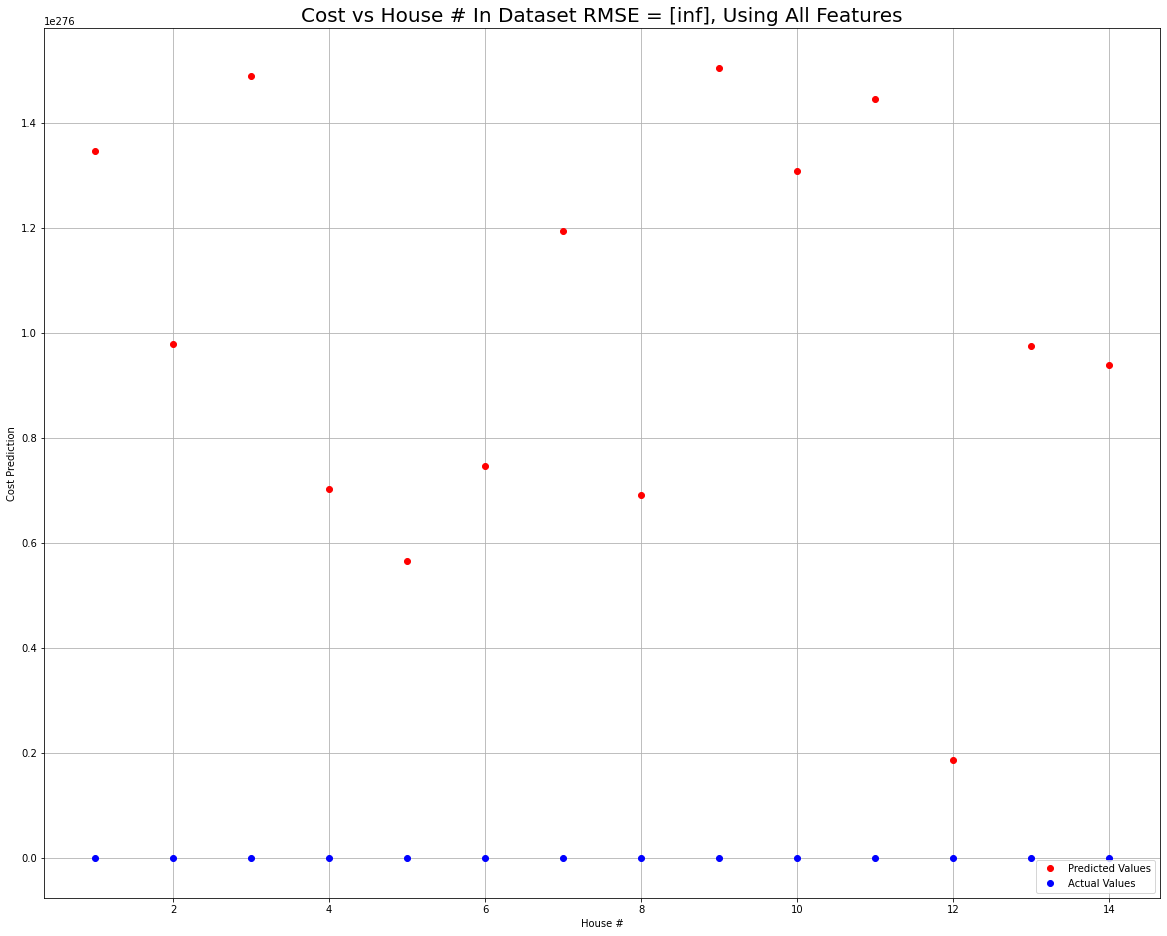

In [650]:
#Initialize the Parameters based upon the dimensionality of the training dataset
[x_train, y_train, x_test, y_test, header] = a1.csvParse('./ML_Assignment1/Assignment1_Q2_Data.csv')
iterations = 100
error = []
y = []

print(f'Initialzed theta array is: {a1.theta}')

plt.figure(7, figsize=[20, 16])

[m, n] = x_train.shape

a1.init_theta(1, n)
error.append(a1.costFunction(x_train, y_train))

#Predictions using the entire feature set. 
for k in range(iterations): #Gradient Descent algorithm. 
        a1.gradientDescent(x_train, y_train)
        error.append(a1.costFunction(x_train, y_train))
        epsilon = np.abs(error[-1] - error[-2])
        if (epsilon < 10e-6):
                print('Convergence threshold met.')
                break

#Make Predictions
for j in range(m):
        y.append(a1.hypothesis(x_test[j]))
        
error = np.sqrt(a1.costFunction(x_test, y_test))

x_range = np.linspace(1, 14, 14)
plt.title(f'Cost vs House # In Dataset RMSE = {error}, Using All Features', fontsize=20)
plt.xlabel('House #')
plt.ylabel('Cost Prediction')
plt.plot(x_range, y, 'ro', label='Predicted Values')
plt.plot(x_range , y_test, 'bo', label='Actual Values')
plt.legend(loc='lower right')
plt.grid()

print(f'Theta array after training: {a1.theta}')

plt.show()

Initialzed theta array is: [[4.05775707e+273 7.47610030e+272 3.54623773e+273 9.29306070e+272
  8.17041127e+272 4.24389614e+273 2.14452230e+273 2.77166161e+274
  1.32424583e+273 7.09144086e+272 1.29117071e+272]]
Theta array after training: [[-1.24771316e+163 -1.07569830e+163 -2.15551197e+162 -1.09702610e+163
  -1.74458189e+162 -5.24864748e+161]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in subtract


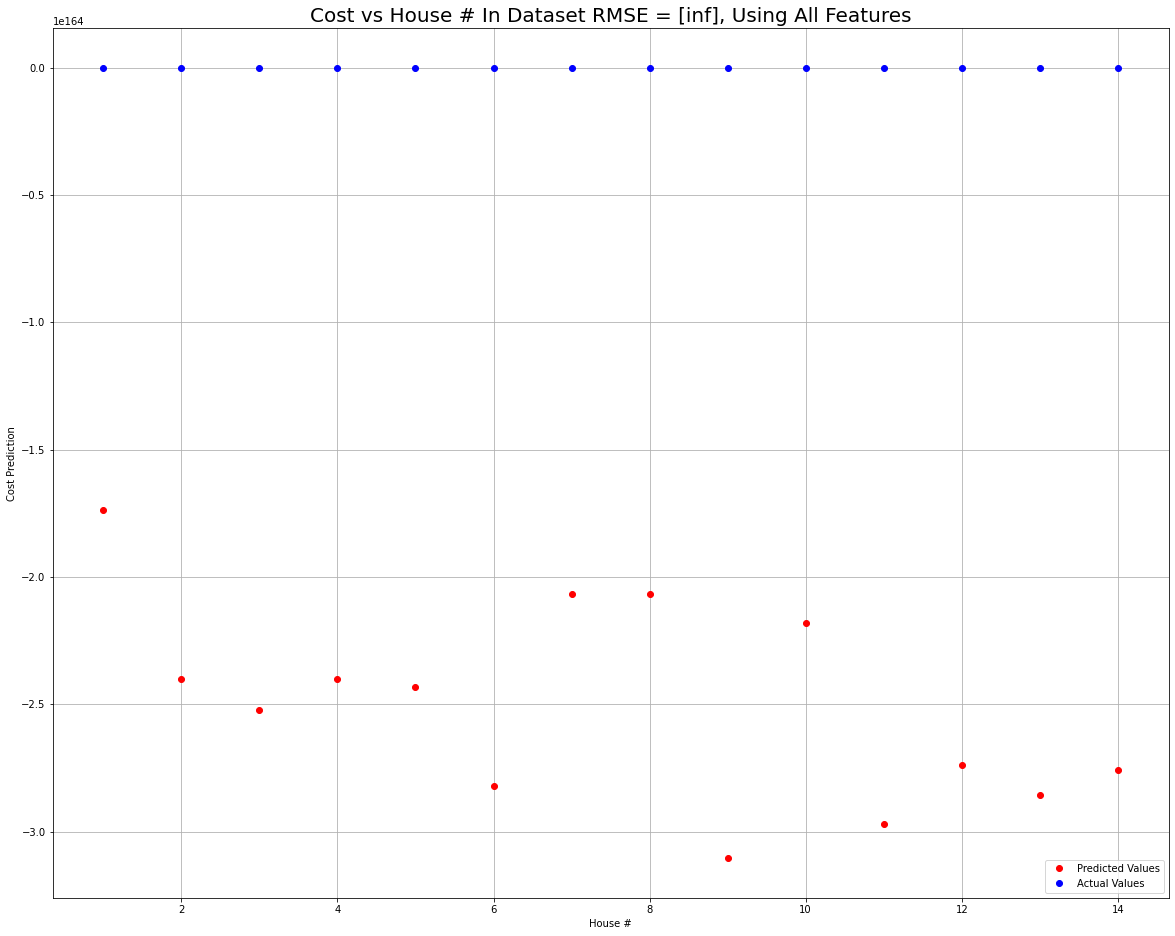

In [651]:
#Initialize the Parameters based upon the dimensionality of the training dataset
[x_train, y_train, x_test, y_test, header] = a1.csvParse('./ML_Assignment1/Assignment1_Q2_Data.csv')
iterations = 100
error = []
y = []

print(f'Initialzed theta array is: {a1.theta}')

plt.figure(8, figsize=[20, 16])

x_train = a1.featureSelection(x_train, [0, 2, 4, 5, 9, 10])
x_test = a1.featureSelection(x_test, [0, 2, 4, 5, 9, 10])

[m, n] = x_train.shape

a1.init_theta(1, n)
error.append(a1.costFunction(x_train, y_train))

#Predictions using the following columns: [0, 2, 4, 5, 9, 10]
for k in range(iterations): #Gradient Descent algorithm. 
        a1.gradientDescent(x_train, y_train)
        error.append(a1.costFunction(x_train, y_train))
        epsilon = np.abs(error[-1] - error[-2])
        if (epsilon < 10e-6):
                print('Convergence threshold met.')
                break

#Make Predictions
for j in range(m):
        y.append(a1.hypothesis(x_test[j]))
        
error = np.sqrt(a1.costFunction(x_test, y_test))

x_range = np.linspace(1, 14, 14)
plt.title(f'Cost vs House # In Dataset RMSE = {error}, Using columns [0, 2, 4, 5, 9, 10]', fontsize=20)
plt.xlabel('House #')
plt.ylabel('Cost Prediction')
plt.plot(x_range, y, 'ro', label='Predicted Values')
plt.plot(x_range , y_test, 'bo', label='Actual Values')
plt.legend(loc='lower right')
plt.grid()

print(f'Theta array after training: {a1.theta}')

plt.show()

As shown in the previous two graphs, utilizing all the features such as in the figure denoting the entire feature set, does not provide remotely accurate predictions for the dataset. While reducing the features like shown above provides a better indication of the price, this is still shown to be inaccurate as the costs are shown to be negative. It's possible that one of the features skewed the effectiveness of linear regression in this case. To best predict the cost of a home using the above models, the most accurate method would be to use a single input feature to provide a linear relationship between aforementioned feature and the cost. Cost vs Living Area is a great example of a closely linear relationship between this combination. 

# Question 2 - Responses
The following are responses to the questions found in the assignment document:


1.   The average least squares error for the best individual feature linear regression model is approximately 5.4 RMSE and as an average least square error, this value is approximately 29.16. 
2.   The feature that effects the final values the most is "Architecture Type". It seems to perform the best with the regression model shown above. 

3. The feature that causes the biggest detriment to the output data is the "Age" of the home. Seemingly, the age is highly sporadic in the training and test data given and provides no clear linear relationship to the cost. The removal of the "Age" feature from the dataset would aid in the accuracy of the linear regression model tremendously. 







# Question 3

The following code utilizes the local weights method to predict data based upon the data found within the training dataset. 

In [652]:
#Question 3
x_test = np.load('./ML_Assignment1/x_test.npy')
x_train = np.load('./ML_Assignment1/x_train.npy')
y_test = np.load('./ML_Assignment1/y_test.npy')
y_train = np.load('./ML_Assignment1/y_train.npy')

[m, n] = x_train.shape

#Initialize parameters used for the local weights calculations:
tao = 0.1
y = []

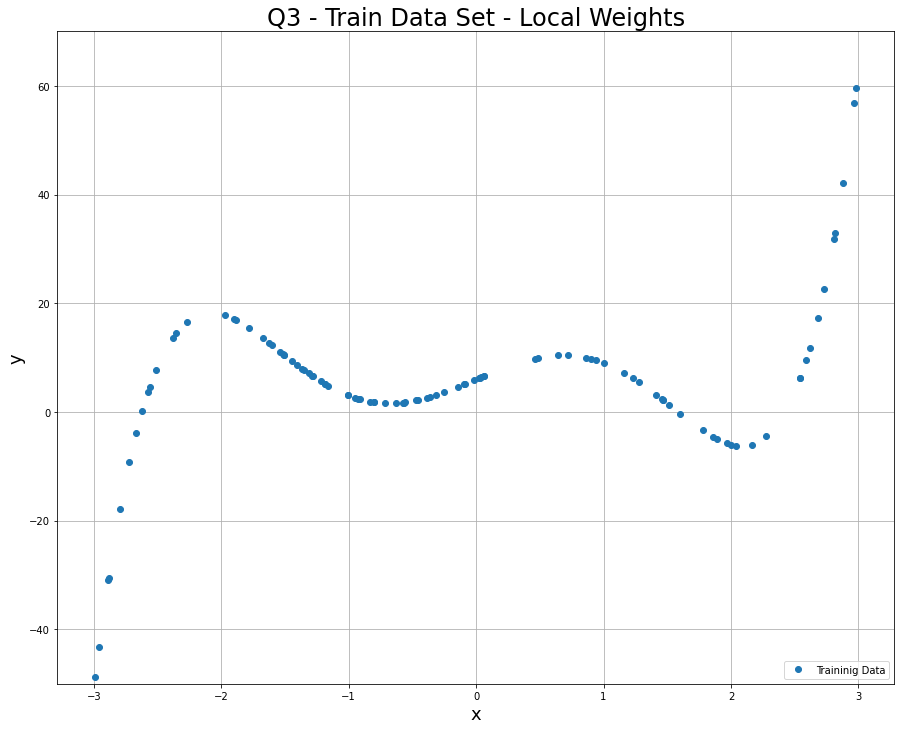

In [653]:
#Plot the initial training data and hypothesis function.
plt.figure(10, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q3 - Train Data Set - Local Weights', fontsize=24)
plt.ylim(-50, 70)
plt.plot(x_train, y_train, 'o', label='Traininig Data')

plt.legend(loc='lower right')
plt.grid()
plt.show()


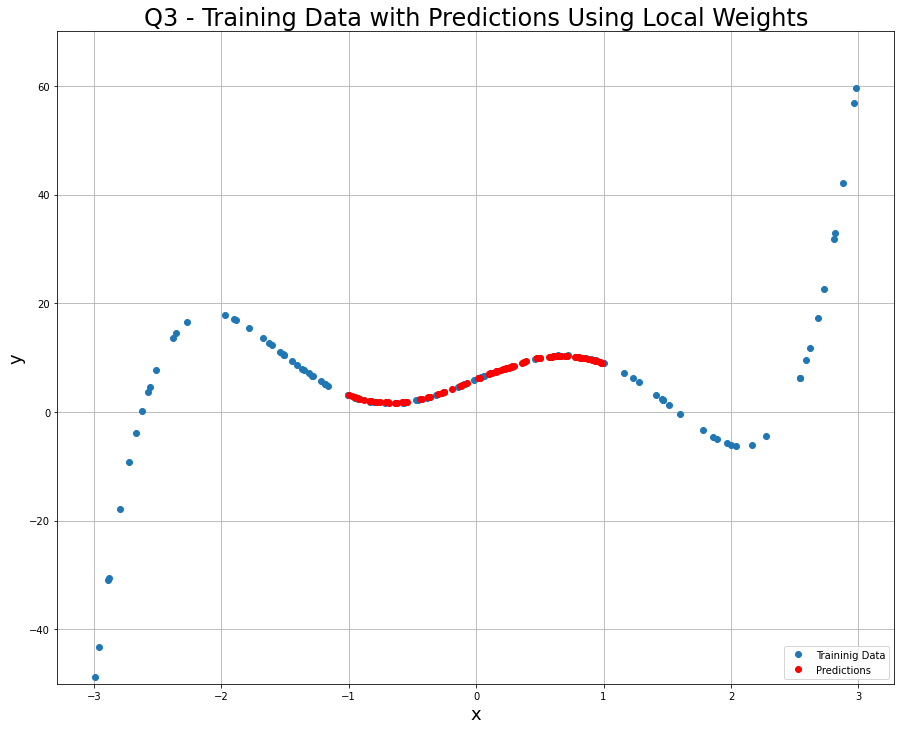

In [654]:
#Setting up for the Local Weights
x_t= np.mat(x_train)
y_t= np.mat(y_train)

o = np.ones((m, 1), dtype = int)

#Below code finds theta, local weights, and the prediction based upon those weights from an input query point. 
for query in x_test:
        query = np.array(query)
        query = np.hstack((1, query))
        query = np.mat(query)
        X = np.hstack((o, x_t))
        W = a1.localWeights(query, tao, X)
        a1.normalEquations(X, W, y_t)
        pre = query * a1.theta
        y.append(pre)

y = np.array(y).reshape((100))

plt.figure(10, figsize=[15, 12])
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title(f'Q3 - Training Data with Predictions Using Local Weights', fontsize=24)
plt.ylim(-50, 70)
plt.plot(x_train, y_train, 'o', label='Traininig Data')
plt.plot(x_test, y, 'ro', label='Predictions')

plt.legend(loc='lower right')
plt.grid()
plt.show()

# Question 3 - Responses:


1.   Using the local weight approach, basis functions are unneccessary in terms of the prediction accuracy and results. However, the drawback of this method is the fact that overfitting occurs and generally, memorizes the model. Generalization outside the bounds of the original dataset will result in inaccuracies due to the lackluster ability to extrapolate new data. 
2.   The difference between this method and the one found in question one is the accuracy of the data. The results found in the question one section of this report showcases the linear nature and the difficulty of providing a model with or without basis functions that will predict as accurately as the method shown here. The inclusion of the data for local weights provide a way for input date to be interpolated between already known points. Therefore, provides a very accurate model. However, as mentioned before, the usage of local weights will be more likely to overfit the data. 

